In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

### 1. Developing algorithms

In [30]:
def gradient_descent_momentum(f, x_curr, y_curr, der_x, der_y, momentum, learning_rate, num_iters):
    history = []
    change_history = []
    change_x = 0
    change_y = 0

    for i in range(num_iters):
        gradient_x = der_x(x_curr, y_curr)
        gradient_y = der_y(x_curr, y_curr)

        change_x = momentum * change_x + learning_rate * gradient_x
        change_y = momentum * change_y + learning_rate * gradient_y

        x_curr -= change_x
        y_curr -= change_y

        current_value = f.subs({x: x_curr, y: y_curr}).evalf()
        history.append(current_value)
        change_history.append([change_x, change_y])

        # Print progress
        print(f"Iteration {i + 1}: x = {x_curr}, y = {y_curr}, f(x, y) = {current_value}")

    return x_curr, y_curr, history, change_history

def adam_optimizer(f, der_x, der_y, x_curr, y_curr, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iters=100):
    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    t = 0

    history = []
    change_history = []
    for i in range(num_iters):
        t += 1
        gradient_x = der_x(x_curr, y_curr)
        gradient_y = der_y(x_curr, y_curr)

        m_x = beta1 * m_x + (1 - beta1) * gradient_x
        m_y = beta1 * m_y + (1 - beta1) * gradient_y

        v_x = beta2 * v_x + (1 - beta2) * gradient_x**2
        v_y = beta2 * v_y + (1 - beta2) * gradient_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)

        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        change_x = learning_rate * m_x_hat / (v_x_hat**0.5 + epsilon)
        change_y = learning_rate * m_y_hat / (v_y_hat**0.5 + epsilon)

        x_curr -= change_x
        y_curr -= change_y

        # Calculate the value of the function and append to history
        current_value = f.subs({x: x_curr, y: y_curr}).evalf()
        history.append(current_value)
        change_history.append([change_x, change_y])

        # Print progress
        print(f"Iteration {i + 1}: x = {x_curr}, y = {y_curr}, f(x, y) = {current_value}")

    return x_curr, y_curr, history, change_history


### 2. Initialising function, derivatives 

In [31]:
x = Symbol('x')
y = Symbol('y')
f = sin(x**2) + y**2 - (3*x/y)

# Compute partial derivatives
derivative_x = f.diff(x)
derivative_y = f.diff(y)

# Define the gradient functions
def der_x(x_val, y_val):
    return derivative_x.subs({x: x_val, y: y_val}).evalf()

def der_y(x_val, y_val):
    return derivative_y.subs({x: x_val, y: y_val}).evalf()

In [32]:
momentum = 0.3
learning_rate = 0.01
num_iters = 3_000
initial_x, initial_y = 1000, 10000
x_opt, y_opt, momentum_history, momentum_change_history = gradient_descent_momentum(f, initial_x, initial_y, der_x, der_y, momentum, learning_rate, num_iters)

Iteration 1: x = 981.264960449337, y = 9799.99999970000, f(x, y) = 96040000.6923265
Iteration 2: x = 976.684888780739, y = 9543.99999930948, f(x, y) = 91087935.8575026
Iteration 3: x = 956.088015115134, y = 9276.31999888446, f(x, y) = 86050113.3906612
Iteration 4: x = 945.934445930274, y = 9010.48959844595, f(x, y) = 81188922.0857427
Iteration 5: x = 960.202633690339, y = 8750.53068599594, f(x, y) = 76571787.6527493
Iteration 6: x = 950.682344988426, y = 8497.53239816482, f(x, y) = 72208055.5223479
Iteration 7: x = 948.120142628975, y = 8251.68226345721, f(x, y) = 68090260.1990419
Iteration 8: x = 964.993041373951, y = 8012.89357735805, f(x, y) = 64206462.6635076
Iteration 9: x = 952.890991878802, y = 7780.99909953026, f(x, y) = 60543945.9632080
Iteration 10: x = 934.881109345511, y = 7555.81077371915, f(x, y) = 57090275.2613312
Iteration 11: x = 918.662800549107, y = 7337.13806001017, f(x, y) = 53833594.9267211
Iteration 12: x = 930.710280260708, y = 7124.79348418533, f(x, y) = 507626

In [34]:
# Example usage:
initial_x, initial_y = 1000, 10_000
x_opt, y_opt, adam_history, adam_change_history = adam_optimizer(f, der_x, der_y, initial_x, initial_y, 
                                            learning_rate=100, beta1=0.9, beta2=0.999, 
                                            epsilon=1e-8, num_iters=3000)

Iteration 1: x = 900.000000000534, y = 9900.00000000005, f(x, y) = 98009999.7027429
Iteration 2: x = 903.246574777154, y = 9800.02745895966, f(x, y) = 96040538.9190003
Iteration 3: x = 907.597487757953, y = 9700.10099227818, f(x, y) = 94091959.9491119
Iteration 4: x = 901.278996297156, y = 9600.23939521868, f(x, y) = 92164597.0392762
Iteration 5: x = 879.066492956113, y = 9500.46160036256, f(x, y) = 90258771.3401788
Iteration 6: x = 857.745914135893, y = 9400.78663480062, f(x, y) = 88374788.0801390
Iteration 7: x = 837.865069312177, y = 9301.23357739064, f(x, y) = 86512945.1303529
Iteration 8: x = 842.395489676980, y = 9201.82151640525, f(x, y) = 84673519.7463101
Iteration 9: x = 830.838305590939, y = 9102.56950788242, f(x, y) = 82856771.7970019
Iteration 10: x = 842.090442988712, y = 9003.49653497603, f(x, y) = 81062950.3180461
Iteration 11: x = 866.330687191624, y = 8904.62146858216, f(x, y) = 79292283.9008178
Iteration 12: x = 902.332183072372, y = 8805.96302949668, f(x, y) = 775449

### 3. Results visualistaion

In [49]:
def plot_optimization_results(function_values, changes):
    # Plot Function Values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(function_values, color='b', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title('Function Value over Iterations')

    # Plot x and y Changes
    plt.subplot(1, 3, 2)
    x_changes = [change[0] for change in changes]
    y_changes = [change[1] for change in changes]
    plt.plot(x_changes, color='r', linestyle='-', label='x_change')
    plt.plot(y_changes, color='g', linestyle='-', label='y_change')
    plt.xlabel('Iteration')
    plt.ylabel('Change')
    plt.legend()
    plt.title('Change in x and y over Iterations')

    plt.tight_layout()
    plt.show()


#### Momentum

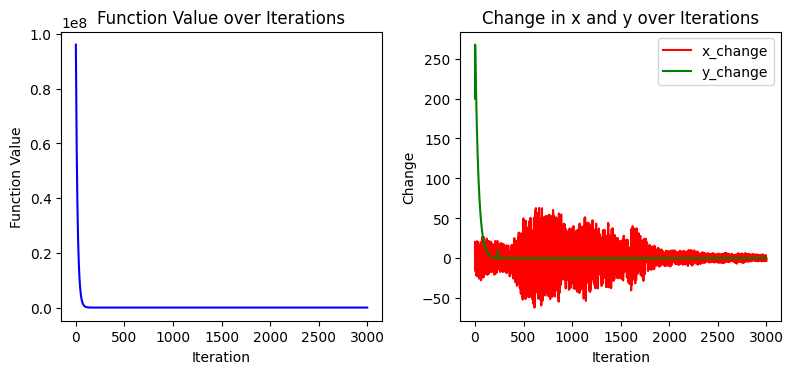

In [50]:
plot_optimization_results(momentum_history, momentum_change_history)


#### Adam

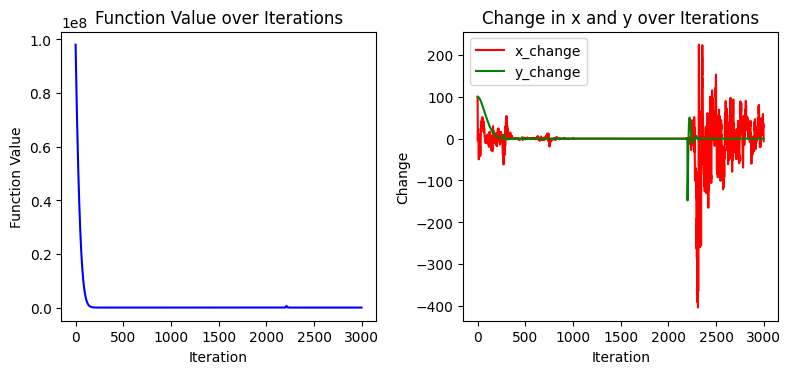

In [52]:
plot_optimization_results(adam_history, adam_change_history)
